# Problem Statement:

A logistics company recorded the time taken for delivery and the time taken for the sorting of the items for delivery. Build a Simple Linear Regression model to find the relationship between delivery time and sorting time with delivery time as the target variable. Apply necessary transformations and record the RMSE and correlation coefficient values for different models.

-------- #### -------------------

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
plt.rcParams['figure.figsize'] = (15,15)

In [3]:
data = pd.read_csv('delivery_time.csv')
data.shape

(21, 2)

We have 21 rows and 2 column

In [4]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
data.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [6]:
data = data.rename(columns = {'Delivery Time':'Delivery_Time', 'Sorting Time': 'Sorting_Time'})
data

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


Lets visualize our data

<AxesSubplot:>

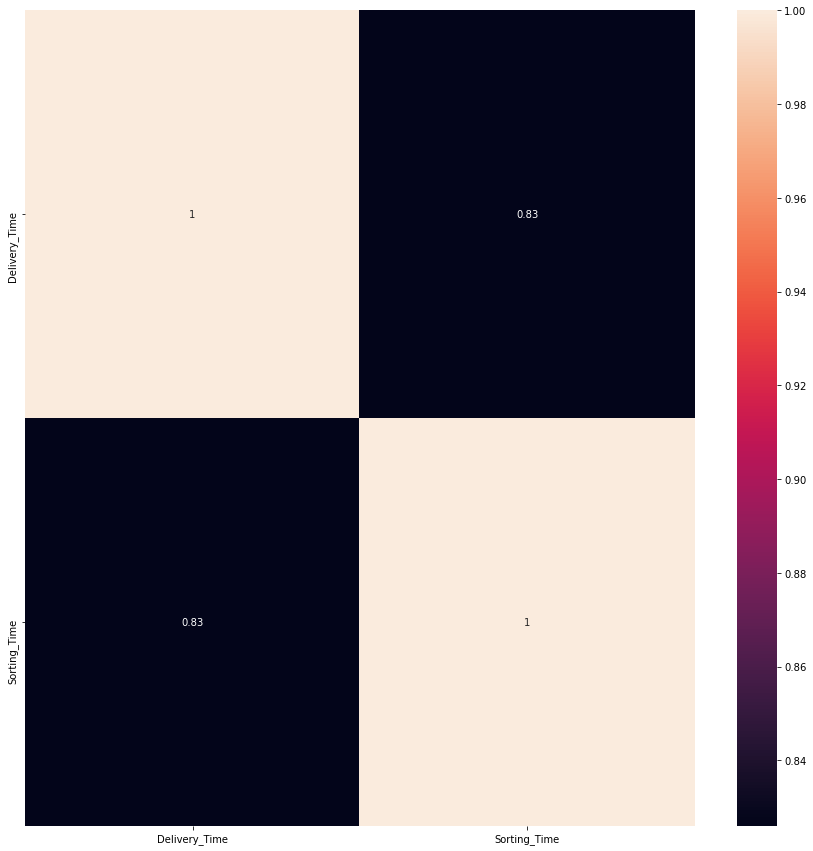

In [7]:
sns.heatmap(data.corr(), annot=True)

In [8]:
data.cov()

,Delivery_Time,Sorting_Time
Delivery_Time,25.754619,10.655810
Sorting_Time,10.655810,6.461905


{'whiskers': [<matplotlib.lines.Line2D at 0x2959ea476d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2959ea47d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x2959ea47370>,
 'medians': [<matplotlib.lines.Line2D at 0x2959ea6e490>,
 'fliers': [<matplotlib.lines.Line2D at 0x2959ea6e7f0>,
 'means': []}

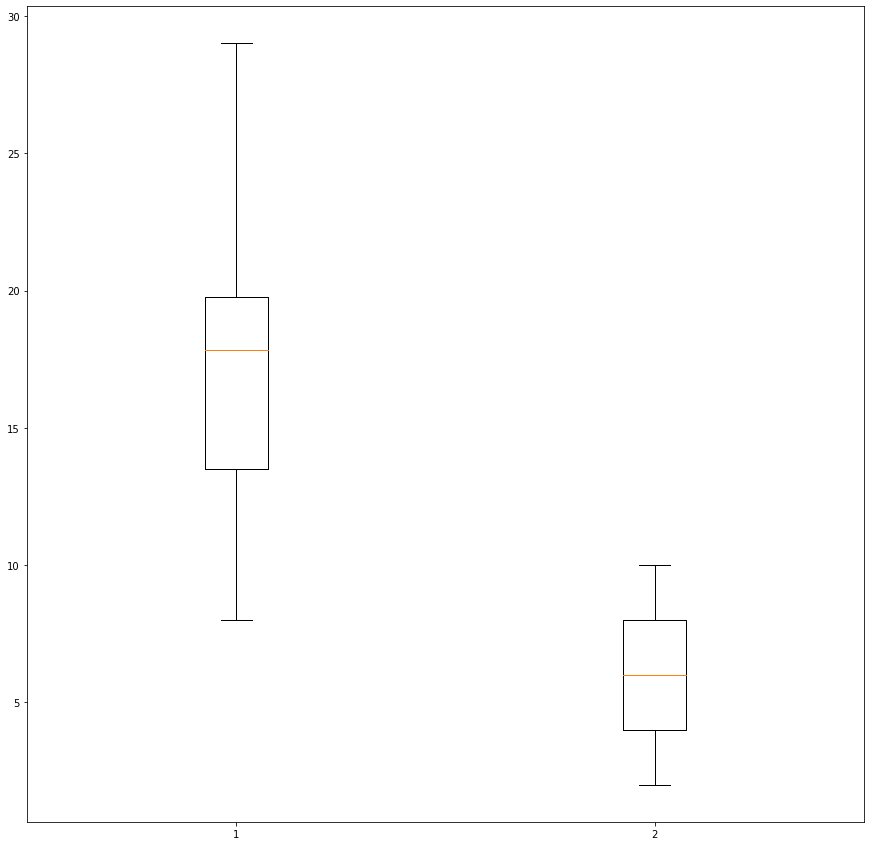

In [9]:
plt.boxplot(data)

C:\Users\jaich\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Delivery_Time', ylabel='Sorting_Time'>

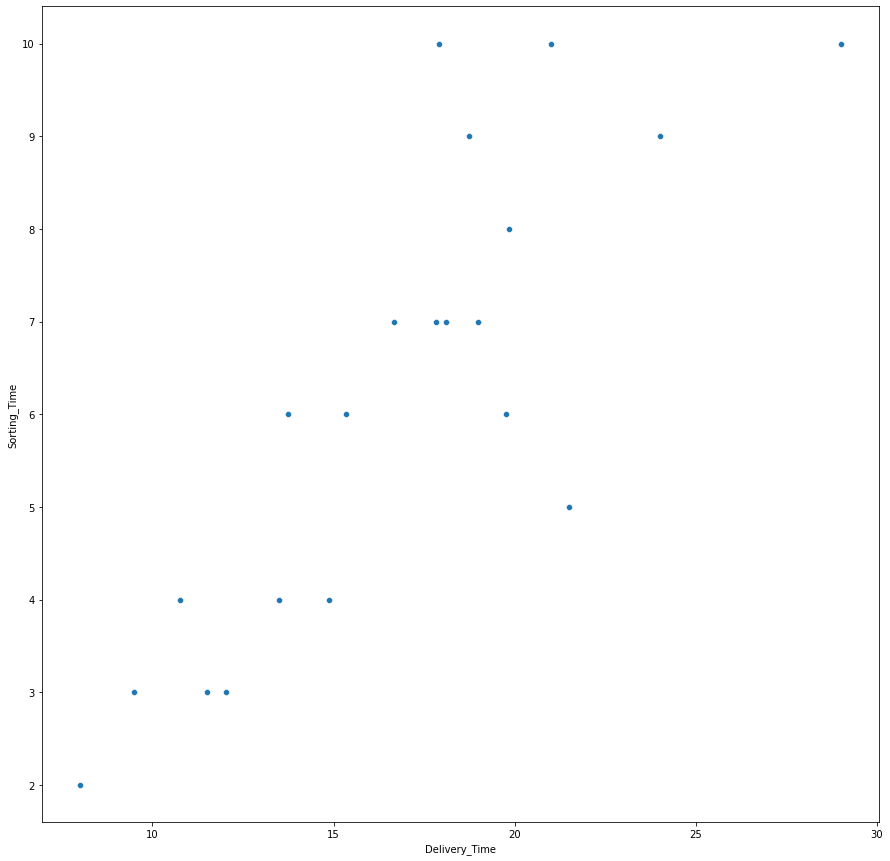

In [11]:
sns.scatterplot(data['Delivery_Time'], data['Sorting_Time'])

Lets Build our models

In [12]:
import statsmodels.formula.api as smf

### Model 1 - Simple Linear Regression

In [13]:
model1 = smf.ols('Delivery_Time ~ Sorting_Time', data=data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 21 Sep 2021   Prob (F-statistic):           3.98e-06
Time:                        14:11:27   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
pred1 = model1.predict(pd.DataFrame(data['Sorting_Time']))
pred1

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

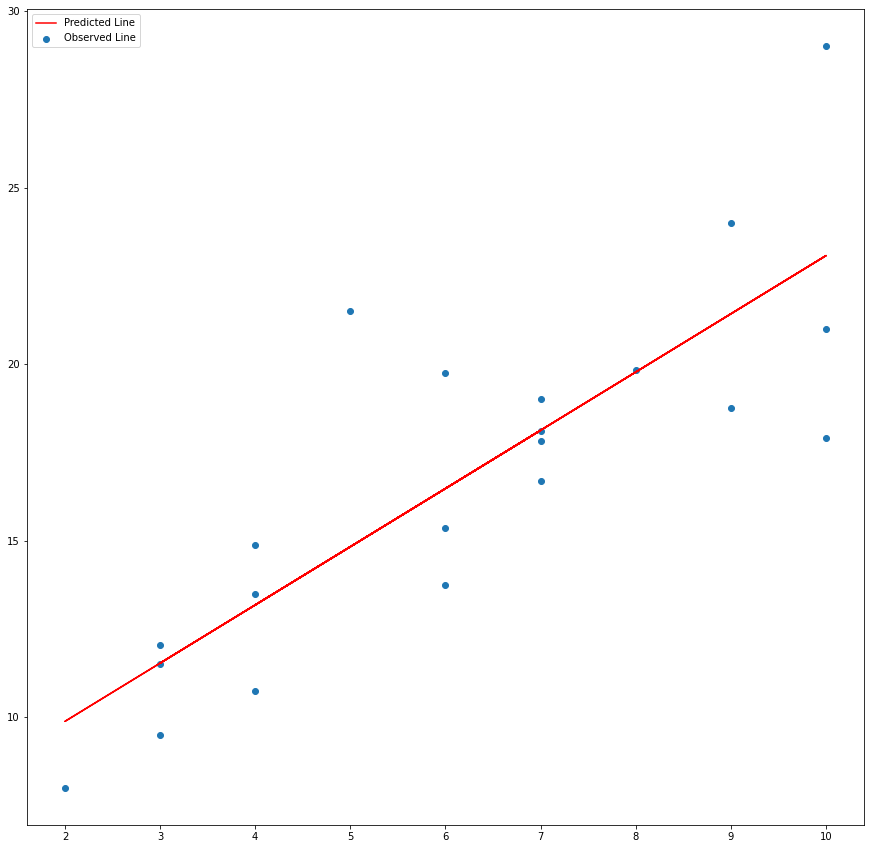

In [16]:
plt.scatter(data['Sorting_Time'],data['Delivery_Time'])
plt.plot(data['Sorting_Time'], pred1,"r")
plt.legend(['Predicted Line', 'Observed Line'])
plt.show()

Lets calculate RMSE score of Model1

In [17]:
res1 = data['Delivery_Time'] - pred1
res_sqrt1 = res1 * res1
mse1 = np.mean(res_sqrt1)
rmse = np.sqrt(mse1)
rmse

2.7916503270617654

## Log Transformation

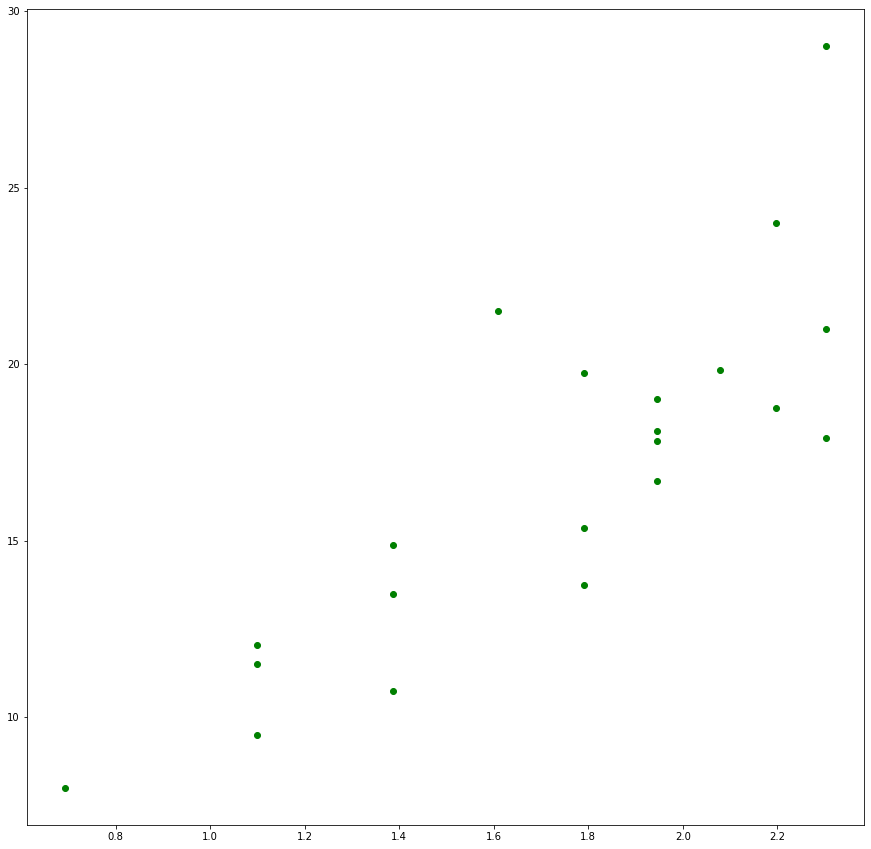

In [18]:
plt.scatter(x=np.log(data['Sorting_Time']), y = data['Delivery_Time'], color='green')

In [19]:
np.corrcoef(np.log(data['Sorting_Time']),data['Delivery_Time'])

array([[1.        , 0.83393253],
       [0.83393253, 1.        ]])

In [20]:
model2 = smf.ols('Delivery_Time ~ np.log(Sorting_Time)', data=data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 21 Sep 2021   Prob (F-statistic):           2.64e-06
Time:                        14:17:52   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sorting_Time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
pred2 = model2.predict(pd.DataFrame(data['Sorting_Time']))

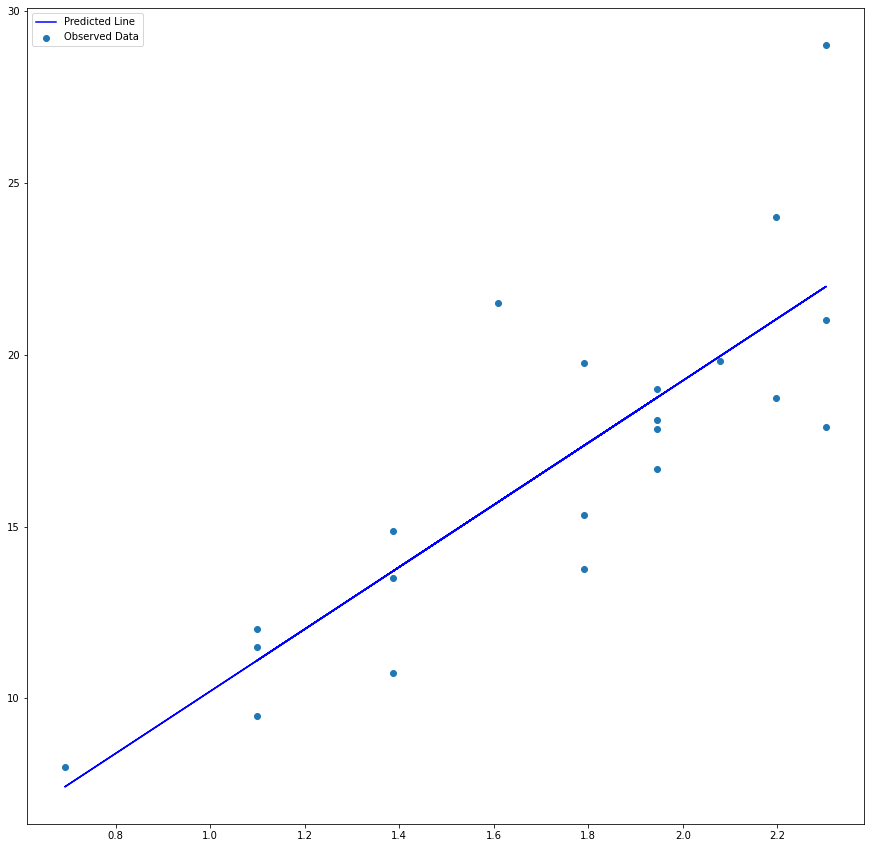

In [22]:
# Regression Line

plt.scatter(np.log(data['Sorting_Time']), data['Delivery_Time'])
plt.plot(np.log(data['Sorting_Time']), pred2, "b")
plt.legend(['Predicted Line', 'Observed Data'])
plt.show()

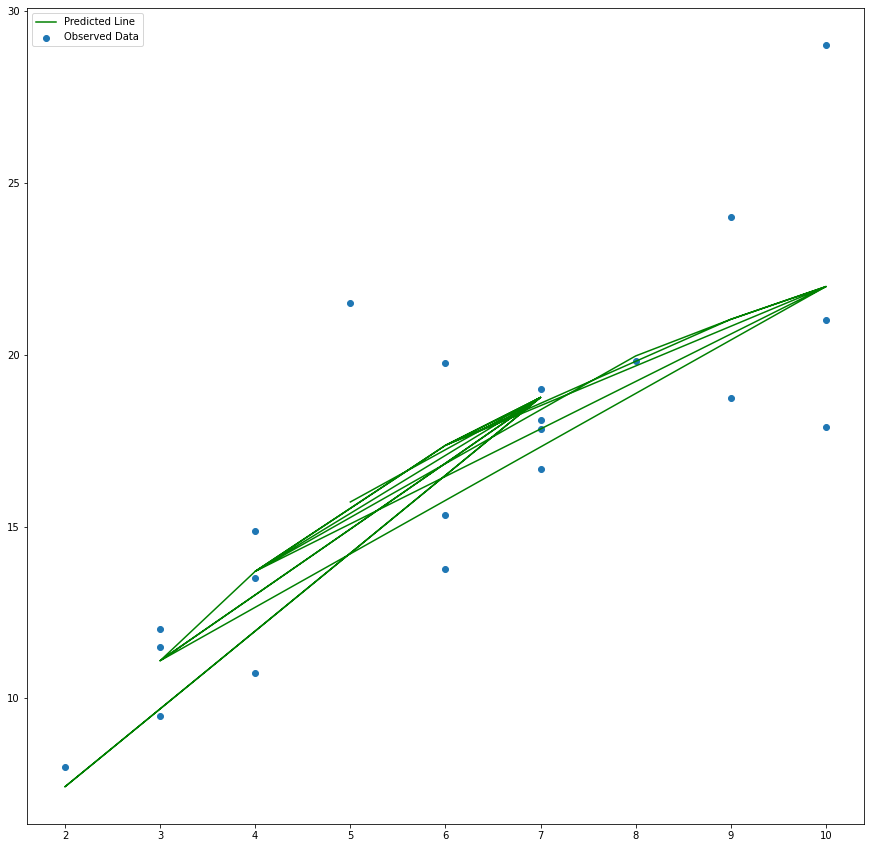

In [23]:
# Other way of showing

plt.scatter(data['Sorting_Time'], data['Delivery_Time'])
plt.plot(data['Sorting_Time'], pred2, "g")
plt.legend(['Predicted Line', 'Observed Data'])
plt.show()

In [24]:
# Error Calculation

res2 = data['Delivery_Time'] - pred2
res_sqrt2 = res2 * res2
mse2 = np.mean(res_sqrt2)
rmse2 = np.sqrt(mse2)
rmse2

2.733171476682066

### Expontential Transformation

X = Sorting Time, y = log(Delivery Time)

array([[1.        , 0.84317726],
       [0.84317726, 1.        ]])

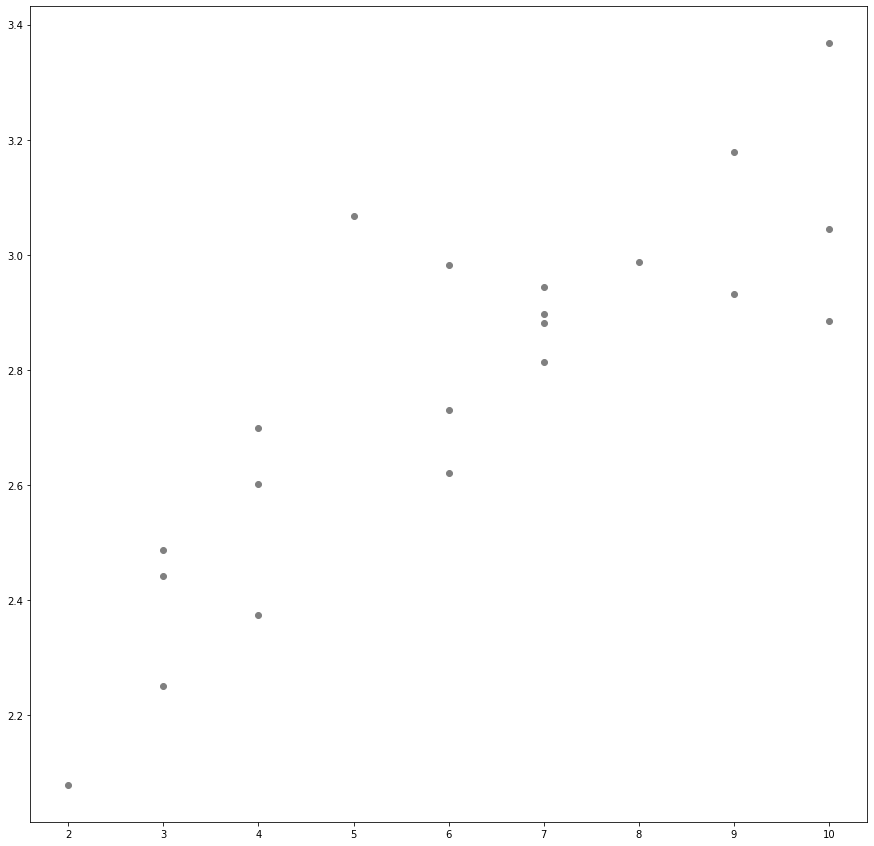

In [25]:
plt.scatter(x=data['Sorting_Time'], y = np.log(data['Delivery_Time']), color = 'grey')
np.corrcoef(data['Sorting_Time'],np.log(data['Delivery_Time']))

In [26]:
model3 = smf.ols('np.log(Delivery_Time) ~ Sorting_Time', data = data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Tue, 21 Sep 2021   Prob (F-statistic):           1.59e-06
Time:                           14:25:42   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
Sorting_Time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
pred3 = model3.predict(pd.DataFrame(data['Sorting_Time']))
pred3_at = np.exp(pred3)
pred3_at

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

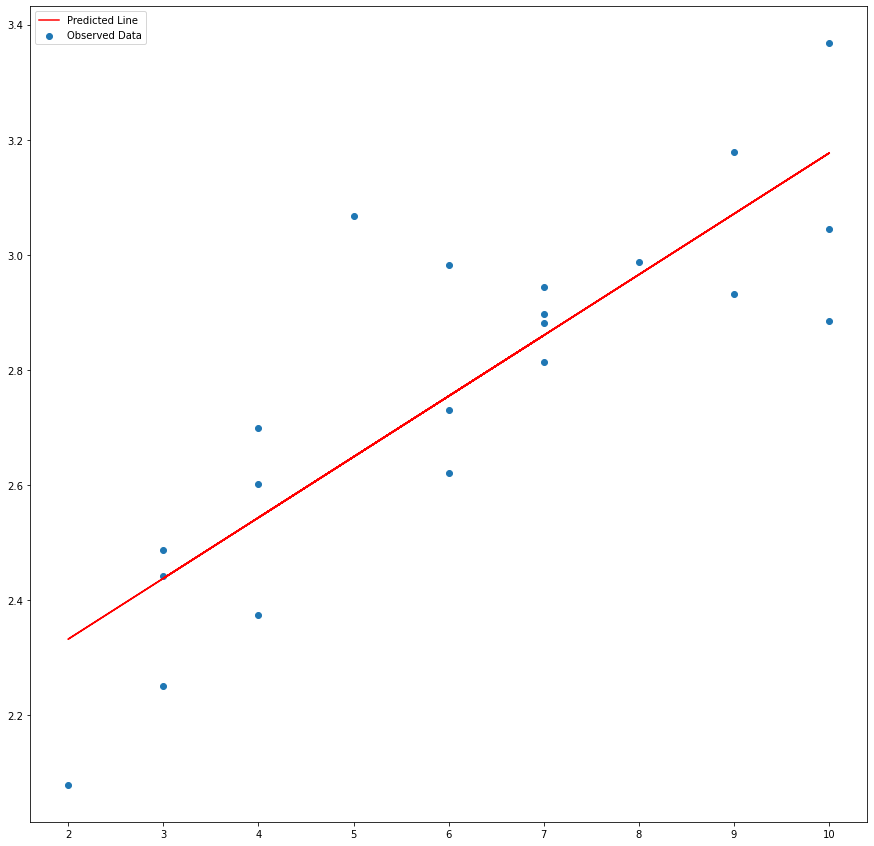

In [28]:
# Regression Line

plt.scatter(data['Sorting_Time'],np.log(data['Delivery_Time']))
plt.plot(data['Sorting_Time'], pred3, "r")
plt.legend(['Predicted Line', 'Observed Data'])
plt.show()

In [29]:
# Error Calculation
res3 = data['Delivery_Time'] - pred3_at
res_sqr3 = res3 * res3
mse3 = np.mean(res_sqr3)
rmse3 = np.sqrt(mse3)
rmse3

2.940250323056201

## Ploynomial Transformation

X = Sorting_Time, x^2 = Sorting_Time * Sorting_Time, y = log(Delivery_Time)

In [30]:
model4 = smf.ols('np.log(Delivery_Time) ~ Sorting_Time + I(Sorting_Time * Sorting_Time)',data=data).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.765
Model:                               OLS   Adj. R-squared:                  0.739
Method:                    Least Squares   F-statistic:                     29.28
Date:                   Tue, 21 Sep 2021   Prob (F-statistic):           2.20e-06
Time:                           14:28:57   Log-Likelihood:                 9.9597
No. Observations:                     21   AIC:                            -13.92
Df Residuals:                         18   BIC:                            -10.79
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          1.6997      0.228      7.441      0.000       1.220       2.180
Sorting_Time                       0.2659      0.080      3.315      0.004       0.097       0.434
I(Sorting_Time * Sorting_Time)    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
pred4 = model4.predict(pd.DataFrame(data['Sorting_Time']))
pred4_at = np.exp(pred4)
pred4_at

0     21.646921
1     12.909227
2     16.995933
3     21.176938
4     21.646921
5     16.995933
6     18.764526
7     10.825502
8     21.646921
9     21.176938
10    20.191891
11    12.909227
12    18.764526
13    10.825502
14    10.825502
15    12.909227
16    16.995933
17    18.764526
18     8.847949
19    18.764526
20    15.003730
dtype: float64

In [32]:
# Regression Line
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X = data.iloc[:, 0:1].values
X_poly = poly_reg.fit_transform(X)
y = data.iloc[:,1].values

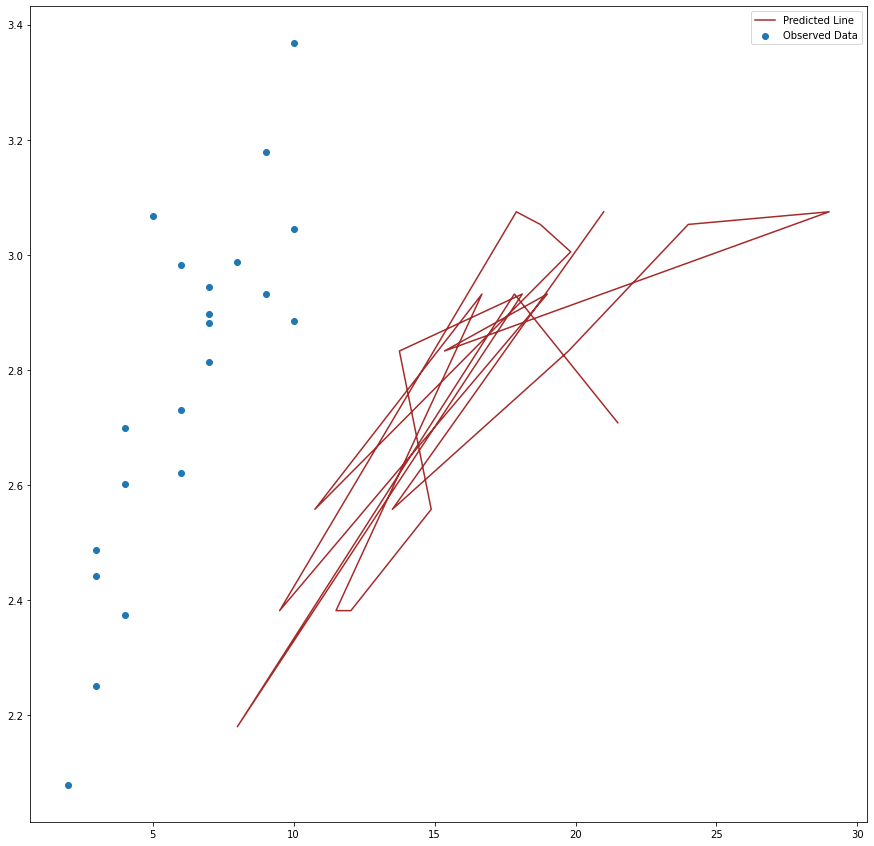

In [33]:
plt.scatter(data['Sorting_Time'], np.log(data['Delivery_Time']))
plt.plot(X,pred4, color = 'brown')
plt.legend(['Predicted Line', 'Observed Data'])
plt.show()

In [34]:
# Error Calculation

res4 = data['Delivery_Time'] - pred4
res_sqrt4 = res4 * res4
mse4 = np.mean(res_sqrt4)
rmse4 = np.sqrt(mse4)
rmse4

14.793141570730082

In [35]:
# Choose the best model using RMSE
data = {"MODEL":pd.Series(["SLR", "Log model", "Exp model", "Poly model"]), "RMSE":pd.Series([rmse, rmse2, rmse3, rmse4])}
table_rmse = pd.DataFrame(data)
table_rmse

,MODEL,RMSE
0,SLR,2.791650
1,Log model,2.733171
2,Exp model,2.940250
3,Poly model,14.793142


The Best model is Log Model with RMSE score of 2.733171